### Mask R-CNN
https://arxiv.org/pdf/1703.06870.pdf


- Framework for object instance segmentation
- Instance segmentation is challenging because it requires the correct detection of all objects in an image while also precisely segmenting each instance
- Mask R-CNN is simple to train and adds only a small overhead to Faster R-CNN, running at 5 fps
- Mask R-CNN , extends Faster R-CNN [34] by adding a branch for predicting segmentation masks on each Region of Interest (RoI), in parallel with the existing branch for classification and bounding box regression
- Faster R-CNN was not designed for pixel-to-pixel alignment between network inputs and outputs. To fix the misalignment, we propose a simple, quantization-free layer, called RoIAlign, that faithfully preserves exact spatial locations.

**Using Mask R-CNN trained model**
0. Docker on _Ubuntu 16.04_
1. Use this Docker image: https://hub.docker.com/r/waleedka/modern-deep-learning/
   - sudo docker pull waleedka/modern-deep-learning
   - sudo docker run -it -p 8888:8888 -p 6006:6006 -v /home/lmiguel/Projects:/Projects waleedka/modern-deep-learning bash
   - cd /Projects
   - jupyter notebook --allow-root

2. Clone and install COCO-API https://github.com/waleedka/coco
   - modify setup.py: replace python for python3
   - make install
   
3. Clone https://github.com/matterport/Mask_RCNN
   - download trained model from: https://github.com/matterport/Mask_RCNN/releases
   - copy the model and this notebook in the repository


In [3]:
import os
import scipy.misc
import matplotlib
import matplotlib.pyplot as plt

import coco
import model as modellib
import visualize

%matplotlib inline 

# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [4]:
ROOT_DIR = os.getcwd()
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)

Processing 1 images
image                    shape: (800, 534, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000


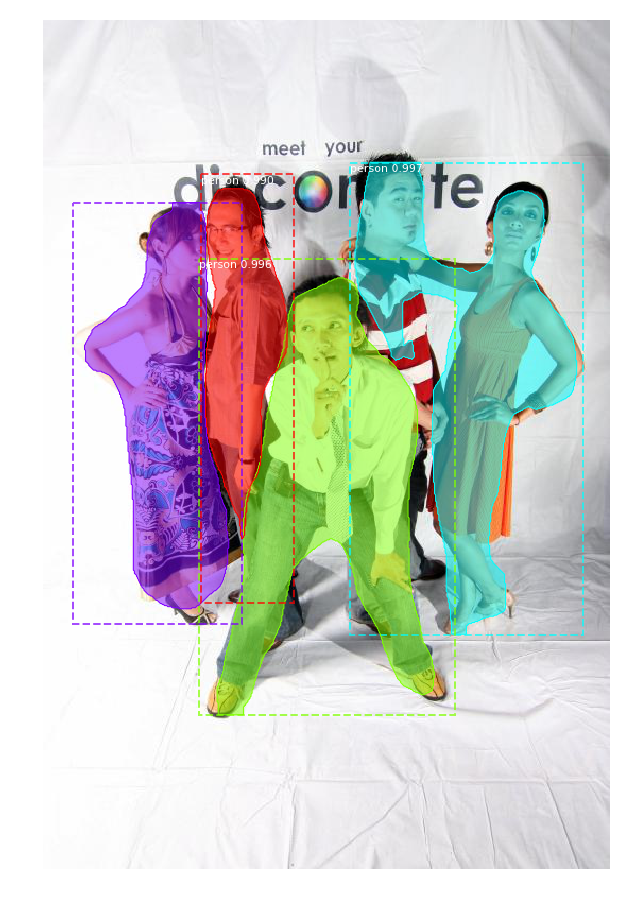

In [5]:
image = scipy.misc.imread("/Projects/datasets/aflw/aflw/data/flickr/0/image00288.jpg")
results = model.detect([image], verbose=1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])